# Interest Risk Models: An Introduction

In this session, we introduce key **credit risk models** that are widely used for interest rate modeling and risk management in finance. These models describe the evolution of interest rates, which are critical for valuing bonds, credit derivatives, and managing credit risk. The models covered are:

1. **Vasicek Model**  
2. **CIR (Cox-Ingersoll-Ross) Model**  
3. **Ho-Lee Model**  
4. **Hull-White Model**  

---

#### 1. Vasicek Model

The **Vasicek Model** is one of the earliest one-factor short-rate models. It assumes that the short-term interest rate follows a **mean-reverting process**:

$$
dr_t = a(b - r_t)dt + \sigma dW_t
$$

Where:  
- $r_t$: Short-term interest rate at time $t$.  
- $a$: Speed of mean reversion.  
- $b$: Long-term mean level of the interest rate.  
- $\sigma$: Volatility of interest rate movements.  
- $dW_t$: Wiener process (random shock).

**Key Characteristics**:  
- The Vasicek model captures mean reversion but allows for negative interest rates, which is a limitation in practice.

---

#### 2. CIR (Cox-Ingersoll-Ross) Model

The **CIR Model** improves on Vasicek by ensuring that interest rates remain **non-negative**. The short rate $r_t$ evolves as:

$$
dr_t = a(b - r_t)dt + \sigma \sqrt{r_t} dW_t
$$

Where:  
- $\sqrt{r_t}$: Ensures volatility is proportional to the square root of the rate, preventing negative rates.  
- Other terms $ a, b, \sigma, W_t$ are as defined in the Vasicek model.

**Key Characteristics**:  
- Non-negativity of interest rates.  
- Suitable for modeling realistic credit risk dynamics.

---

#### 3. Ho-Lee Model

The **Ho-Lee Model** is a no-arbitrage interest rate model where the short-term rate follows a **stochastic process** with a drift term calibrated to match the observed yield curve:

$$
dr_t = \theta(t) dt + \sigma dW_t
$$

Where:  
- $\theta(t)$: Time-dependent drift term, calibrated to fit the current yield curve.  
- $\sigma$: Constant volatility.

**Key Characteristics**:  
- A simple and flexible model for fitting current yield curves.  
- Allows for deterministic shifts in rates but does not capture mean reversion.

---

#### 4. Hull-White Model

The **Hull-White Model** extends the Vasicek model by incorporating a **time-dependent mean reversion level** $\theta(t)$, making it more flexible for fitting market data:

$$
dr_t = a(\theta(t) - r_t)dt + \sigma dW_t
$$

Where:  
- $\theta(t)$: A time-dependent function used to calibrate the model to the current yield curve.  
- $a$: Mean-reversion speed.  
- $\sigma$: Volatility.

**Key Characteristics**:  
- Combines the benefits of Vasicek's mean reversion with the flexibility to fit real-world yield curves.  
- Widely used for pricing interest rate derivatives and managing credit risk.

---

#### Summary of Models

| **Model**         | **Key Feature**                     | **Formula**                             |
|--------------------|-------------------------------------|-----------------------------------------|
| **Vasicek**       | Mean-reverting, allows negatives    | $dr_t = a(b - r_t)dt + \sigma dW_t$ |
| **CIR**           | Mean-reverting, no negatives        | $dr_t = a(b - r_t)dt + \sigma \sqrt{r_t} dW_t $ |
| **Ho-Lee**        | Arbitrage-free, time-dependent drift| $ dr_t = \theta(t) dt + \sigma dW_t $ |
| **Hull-White**    | Mean-reverting + time-dependent mean| $ dr_t = a(\theta(t) - r_t)dt + \sigma dW_t $ |

---

#### Practical Applications

These models are crucial for:  
- **Valuing Bonds**: Pricing fixed-income securities under stochastic interest rates.  
- **Risk Management**: Assessing credit risk and interest rate risk for portfolios.  
- **Credit Derivatives**: Valuing instruments like credit default swaps (CDS).  
- **Yield Curve Calibration**: Matching observed yield curves to derive realistic interest rate paths.

By understanding and implementing these models, we can better quantify and manage risks in financial markets.


### Code Implementation


We simulated and visualized short-term interest rate paths using four key stochastic models: Vasicek, CIR (Cox-Ingersoll-Ross), Ho-Lee, and Hull-White. Each model captures different aspects of interest rate dynamics, such as mean reversion (Vasicek and Hull-White), non-negativity (CIR), and time-dependent drifts (Ho-Lee and Hull-White). By generating random shocks over 252 trading days for 5 simulations, the code produces interest rate paths and plots them in a 2x2 grid, enabling direct comparison of model behaviors. This approach is useful for understanding how rates evolve under various assumptions and for applications in risk management and fixed-income pricing


#### Load Package

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Simulate data and set the parameters

In [ ]:
# Parameters for the models
n_days = 252  # Time horizon in days
n_simulations = 5  # Number of simulations
dt = 1 / 252  # Time step (1 trading day)

# Model Parameters
r0 = 0.03  # Initial interest rate
a = 0.1    # Mean reversion speed
b = 0.04   # Long-term mean level
sigma = 0.01  # Volatility
theta_func = lambda t: 0.04 + 0.001 * t  # Time-dependent drift for Ho-Lee and Hull-White

# Seed for reproducibility
np.random.seed(42)

#### Define each credit models

In [ ]:
# Function for simulating Vasicek model
def vasicek_model(r0, a, b, sigma, n_days, n_simulations, dt):
    rates = np.zeros((n_days, n_simulations))
    rates[0] = r0
    for t in range(1, n_days):
        dW = np.random.normal(0, np.sqrt(dt), n_simulations)
        rates[t] = rates[t-1] + a * (b - rates[t-1]) * dt + sigma * dW
    return rates

In [ ]:
# Function for simulating CIR model
def cir_model(r0, a, b, sigma, n_days, n_simulations, dt):
    rates = np.zeros((n_days, n_simulations))
    rates[0] = r0
    for t in range(1, n_days):
        dW = np.random.normal(0, np.sqrt(dt), n_simulations)
        rates[t] = rates[t-1] + a * (b - rates[t-1]) * dt + sigma * np.sqrt(rates[t-1]) * dW
        rates[t] = np.maximum(rates[t], 0)  # Ensure non-negativity
    return rates

In [ ]:
# Function for simulating Ho-Lee model
def ho_lee_model(r0, sigma, theta_func, n_days, n_simulations, dt):
    rates = np.zeros((n_days, n_simulations))
    rates[0] = r0
    for t in range(1, n_days):
        dW = np.random.normal(0, np.sqrt(dt), n_simulations)
        theta = theta_func(t * dt)
        rates[t] = rates[t-1] + theta * dt + sigma * dW
    return rates

In [ ]:
# Function for simulating Hull-White model
def hull_white_model(r0, a, sigma, theta_func, n_days, n_simulations, dt):
    rates = np.zeros((n_days, n_simulations))
    rates[0] = r0
    for t in range(1, n_days):
        dW = np.random.normal(0, np.sqrt(dt), n_simulations)
        theta = theta_func(t * dt)
        rates[t] = rates[t-1] + a * (theta - rates[t-1]) * dt + sigma * dW
    return rates

#### Model Simulations

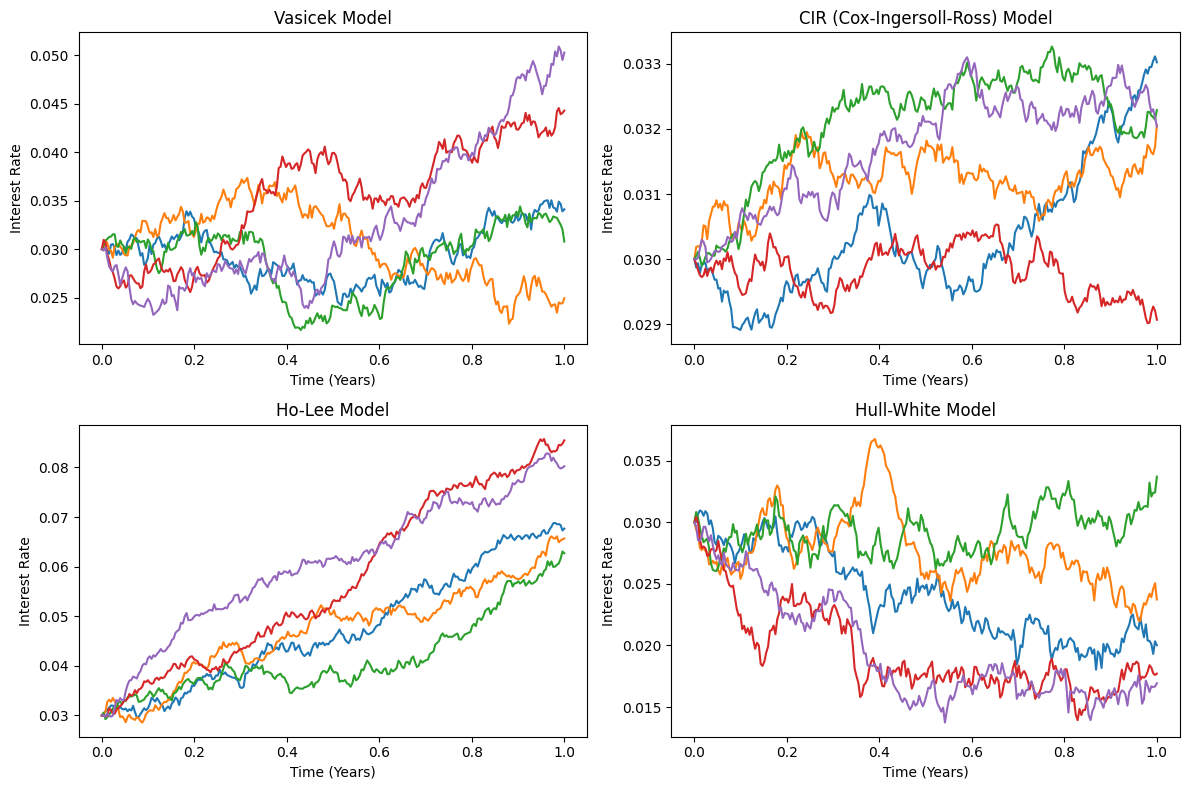

In [ ]:
# Simulate models
vasicek_rates = vasicek_model(r0, a, b, sigma, n_days, n_simulations, dt)
cir_rates = cir_model(r0, a, b, sigma, n_days, n_simulations, dt)
ho_lee_rates = ho_lee_model(r0, sigma, theta_func, n_days, n_simulations, dt)
hull_white_rates = hull_white_model(r0, a, sigma, theta_func, n_days, n_simulations, dt)

# Plot results
time = np.linspace(0, n_days * dt, n_days)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time, vasicek_rates)
plt.title("Vasicek Model")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")

plt.subplot(2, 2, 2)
plt.plot(time, cir_rates)
plt.title("CIR (Cox-Ingersoll-Ross) Model")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")

plt.subplot(2, 2, 3)
plt.plot(time, ho_lee_rates)
plt.title("Ho-Lee Model")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")

plt.subplot(2, 2, 4)
plt.plot(time, hull_white_rates)
plt.title("Hull-White Model")
plt.xlabel("Time (Years)")
plt.ylabel("Interest Rate")

plt.tight_layout()
plt.show()


The plots above showcase simulations of short-term interest rates using four key models: **Vasicek**, **CIR (Cox-Ingersoll-Ross)**, **Ho-Lee**, and **Hull-White**. The **Vasicek** and **Hull-White** models exhibit mean-reverting behavior, with Hull-White adding flexibility through a time-dependent mean level. The **CIR model** ensures non-negative rates by scaling volatility with the square root of the rate, making it more realistic for credit risk. In contrast, the **Ho-Lee model** produces linear trends driven by a time-dependent drift, making it suitable for fitting yield curves but lacking mean reversion. Together, these models provide tools for simulating interest rate dynamics, valuing fixed-income securities, and managing credit risk in financial markets.
